## Implementing a Multilayer Artificial Neural Network from Scratch



- Deep learning is the __hottest__ topic in the machine leanring field.
- <font style='color:#822879'>Deep learning can be understood as a set of algorithms that were developed to train artificial nueral networks with __many layers most efficiently__.</font>

- Artificial neurons represent the building blocks of the multilayer artificial neural networks.
- early studies of neural networks go back to the 1940s when __ Warren McCulloch and Walter Pitt first described how neurons could work.__
- in 1986 the interest in neural networks rekindled when __D.E.Rumelhart, G.E.Hilton,__ and __R.J.Williams__ were involved in the (re)discovery and popularization of the backpropogatation algorithm ot train neural netwroks more efficiently.


Some of the Many exciting application of DNNs :

- Facebook's DeepFace for tagging images
- Baidu's DeepSpeech , which is able ot handle voice queeries in Mandarin
- Google's new lanuage translaiton service
- Novel Techniques for drug dscoery and toxicity prediciton.
- A mobile application that can detect skin cancer with an accuracy similar to professionally trained deramtologists.

### Introducing the multilayer neural network architecture

![MLN.png](MLN.png)

The MLP depicted in the preceding figure has one input layer, one hidden layer and one output layer. The units in the hidden layer are fully connected to the input layer, and the output layer is fully connected to the hidden layer. If such a network has more than one hidden layer, we also call it a __deep artificial neural network.__

> Practically, we can thing of the number of layer and units in a neural network as additional hyperparametes that we want to optimize for a given problem task using cross-validation techniques.

>However the error gradients that we will calculate later via backpropagation will become increasingly small as more layer are added to a network. this vanishing gradient problem makes the model learning more challenging. Therefore, special algorithms have been developed to help train such deep neural network structures; this is known as __deep learning__

![3_4_3_MLP.png](3_4_3_MLP.png)

__Note__ : Here, the activation units $a^{(in)}_0 $ and $a^{(h)}_0 $  are the __bias units__, which we set to 1. Later , we will implement the multilayer perceptron using separate vectors for the bias unit.

## Activating a neural network via forward propagation

To undestand how __forward propagation__ fits into the context of learning an MLP model, let's ummarize the MLP learning prcedure in three simple steps:

1. Starting at the input layer, we forward propagate the patterns of the taringing data through thenetwork to genrate an output.
2. Based on the networks's output, we calculate the error that we want to minmize using a cost function that we will describe later.
3. We backpropagate the error, find its derivative with respect to each weight in the network, andupdate the model.

Finally, aftwer we repeapt these three steps for mulitple _epochs_ and learn the weights of the MLP, we use forward propagation to calcuate the network output and apply a thershold function(like softmax) to obtain the predicted class labels.


__Now__ let's walk through the individual steps of forward propagation to generate an output from the patterns in the training data.

Since each unit in the hidden layer is conneted to all units in the input layers,we first calculate the activation unit of the idden layer $ a^{(h)}_1 $ as follows:

<center>$ z^{(h)}_{1} =  a^{(in)}_{0} w^{(h)}_{(0,1)}+ a^{(in)}_{1} w^{(h)}_{1,1} + ... + a^{(in)}_{m} w^{(h)}_{m,1} $</center>

<center>$ a_1^{(h)} =\phi (z^{(h)}_i) $</center>


Here , $ z^{(h)}_{1} $ is the net input and $\phi (.)$ is the activation function, which has to be differentiable to learn the weights that connect the neurons using a gradient-based approach.


<br>
<br>
MLP is a typical example of a feedforward articicial neural network. The term __feedforward__ refers to the fact that each layer serves as the input to the next layer without loops, in contrast to recurrent neural networks - an architecture - discussed in other chapter.
The _Multilayer perceptron_ may sound a little bit confusing since the artificial neurons in this network architecture are typically __sigmoid units, not perceptrons__ 

<br>
For coding efficiency and readability, we will now write the activation in a more compact form using the concepts of basic linear algebra.

<center> $ z^{(h)} = a^{(in)}W^{h} $</center>
<center> $ a^{(h)} =  \phi (a^{(h)}) $</center>

Here, $a^{(in)}$ is our _ 1 x m _ dimensional featuer vector of a sample __$ x^{(in)} $ __ plus a bias unit. 
$ W^{(h)} $ is an _ m x d _ dimensional weight matrix where d is the number of units in the hidden layer. After matri-vector multiplication, we obtain the _ 1xd _  dimensional net input vector __$ z^{(h)} $ __ to calculate the activation __ $ a ^{(h)}$ __ (where $ a ^{(h)} \epsilon R^{1xd} $. Furthermore, we can genralize this compuatation to all _n_ samples in the training set:

<center> $ Z^{(h)} = A^{(in)}W^{(h)} $</center>

here $A{(in)} $ is now an _nxm_ matrix

<center> $A^{(h)} = \phi (Z^{(h)}) $</center>
<br>
similary we can write the activation of the output layer is vectorized form for multiple samples:

<center> $ Z^{(out)} = A^{(h)}W^{(out)} $</center>

<center> $A^{(out)} = \phi (Z^{(out)}) ,  \space \space A^{(out)} \space  \epsilon \space R^{nxt} $

## Classifying handwritten digits

We will implement and train our first multilayer neural network to classify handwritten digits from the popular __Mixed National Institute of Standards and Technology (MNIST)__ dataset that has been constructed by Yann Lecun and others.

The MNIST set consists of handwritten digits from 250 different people.
The images are stored in byte format, and we will read them into NumPy  arrays that we will use to train and test our MLP implementation.

In [18]:
import os
import struct
import numpy as np

def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte' % kind)    
    
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
#         print(magic, n)
        labels = np.fromfile(lbpath, dtype = np.uint8)
    
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII', imgpath.read(16))
#         print(magic, num, rows, cols)
        images =np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)
        images = ((images / 255.) - .5)*2
    
    return images, labels

The training dataset consist of 60,000 training digits and the test set contains 10,000 samples. The images in the MNIST dataset consist of 28x28 pixels, and each pized is repsented by a gray scale intensity values. Here we unroll the 28 x28 pizedls into one-dimensional row vectors , which represent the rows in our _images_ aray (784 per row or image). the class _labels_ (integer 0-9) of the hnadwritten digits.


In [19]:
X_train, y_train = load_mnist('', kind='train')
print('Rows: %d, columns: %d' %(X_train.shape[0], X_train.shape[1]))

Rows: 60000, columns: 784


In [20]:
X_test, y_test = load_mnist('', kind='t10k')
print('Rows: %d, columns: %d' %(X_test.shape[0], X_test.shape[1]))

Rows: 10000, columns: 784


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

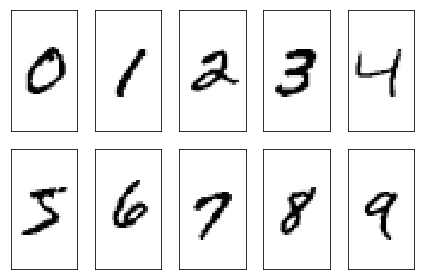

In [29]:
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)

ax = ax.flatten()

for i in range(ax.shape[0]):
    img = X_train[y_train == i][0].reshape(28,28)
    ax[i].imshow(img, cmap='Greys')
    
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

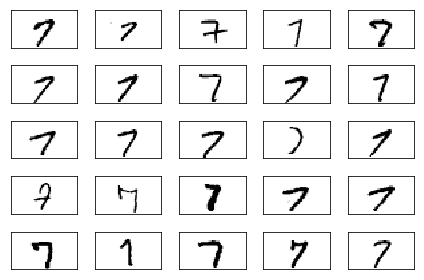

In [31]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)

ax = ax.flatten()

for i in range(25):
    img = X_train[y_train == 7][i].reshape(28,28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

 It is a good idea, to save the scaled images in a format that we can load more quickly into a new Python session to avoid the overhead of reading in and processsing the data again.
 
 An efficient yet most convenient method to save multidimensional arrays to disk is NumPy's ___savez___ function. The ___savez_ function is analogous to Python's _pickle_ module for storing NumPy arrays. __
- <font style='color:#822879'>The _savez_ function produces zipped archives of our data, producing ___.npz___ files that __contain files in the _.npy___ format.</font>
- Further, instead of using _savez_ we will use _save\_compressed_ which uses the same syntax as _savez_, but further compresses the output file down to sustantially smaller file sizes.

In [1]:
import numpy as np

In [33]:
np.savez_compressed('mnist_scaled.npz',
                    X_train=X_train,
                   y_train=y_train,
                   X_test=X_test,
                   y_test=y_test)

In [2]:
mnist  =np.load('mnist_scaled.npz')
mnist.files

['X_train', 'y_train', 'X_test', 'y_test']

In [3]:
X_train = mnist['X_train']
y_train = mnist['y_train']
X_test = mnist['X_test']
y_test = mnist['y_test']

## Implementing a multilayer perceptron

We will implement the code of an MLP wiht one input, one hidden and one output to classify the images in the MNIST dataset.

In [8]:
import numpy as np
import sys

class NeuralNetMLP(object):
    """Feed forward neural network / Multi -layer perceptorn  classifier.
    
    Parameters
    ----------
    
    n_hidden : int (default:30)
        Number of hidden units.
    l2 : float (default: 0.)
        Lambda value for L2-regularization
    epochs : int (default ;100)
        Number of passes over the training set.
    eta : float (default: 0.001)
        Learning rate
    shuffle : bool (default: True)
        Shuffles training data every epoch 
        if True to prevent circles.
    minibatch_size : int (default : 1)
        Number of training smaples per minibatch.
    seed : int (default: None)
        Random seed for initialzing weights and shuffling
        
    Attributes
    ----------
    eval_ : dict
        Dictionalry collecting the cost, trianing accuracy, 
        and validation accuracy for each epoch during training.
    """
    def __init__(self, n_hidden=30, l2=0., epochs=100, eta=0.001,
                shuffle=True, minibatch_size=1, seed=None):
        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatch_size = minibatch_size
    
    def _onehot(self, y, n_classes):
        """Encode labels into one-hot representation
        
        Parameters
        ----------
        y : array, shape = [n_samples]
            Target values.
            
        Returns
        ----------
        onehot : array, shape = (n_samples, n_labels)
        """
        onehot = np.zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.
        return onehot.T
        
    def _sigmoid(self, z):
        """Compute logistic function (sigmoid)"""
        return 1. / (1 + np.exp(-np.clip(z, -250, 250)))
    
    def _forward(self, X):
        """Compute forward propagation step"""
        
        # step 1 : net input of hidden layer
        # [n_samples, n_features] dot [n_features, n_hidden]
        # -> [n_samples, n_hidden]
        
        z_h = np.dot(X, self.w_h) + self.b_h
        
        # step 2 : activation of hidden layer
        a_h = self._sigmoid(z_h)
        
        # step 3: net input of output layer
        # [n_samples, n_hidden] dot [n_hidden, n_classlabels]
        # -> [n_samples, n_classlabels]
        z_out = np.dot(a_h, self.w_out) + self.b_out
        
        # step 4 : activation of output layer
        a_out = self._sigmoid(z_out)
        
        return z_h, a_h, z_out, a_out
    
    def _compute_cost(self, y_enc, output):
        """Compute cost function
        
        Parameters
        ------------
        
        y_enc : array, shape = (n_samples, n_labels)
            one-hot encoded class labesl.
        output : array, hsape = [n_samples, n_output_units]
            Activation of the output layer (forward progagation)
            
        Returns
        ---------
        cost : float
            Regularized cost
            
        """
        L2_term = (self.l2 *
                  (np.sum(self.w_h ** 2.) +
                  np.sum(self.w_out ** 2.)))
        
        term1 = -y_enc * (np.log(output))
        term2 = (1. - y_enc) * np.log(1. - output)
        cost = np.sum(term1 - term2) + L2_term
        return cost
    
    def predict(self, X):
        """Predict class labels
        
        Parameters
        ------------
        X : array, shape = [n_samples, n_features]
            Input layer with original features.
            
        Returns
        ---------
        y_pred : arrray, shape = [n_samples]
            Predicted class labels.
            
        """
        
        z_h, a_h, z_out, a_out = self._forward(X)
        y_pred = np.argmax(z_out, axis=1)
        return y_pred
    
    def fit(self, X_train, y_train, X_valid, y_valid):
        """ Learn weights form training data.
        
        Parameters
        -------------
        
        X_train : array, shape = [n_samples, n_features]
            Input layer with original featues.
        y_train : array, shape = [n_samples]
            Target class labels.
        X_valid : array, shape = [n_samples, n_features]
            Sample fatures for validation during training
        y_valid : array, shape = [n_samples]
            Sample labels for validaiton during training
            
        Returns:
        ------------
        self
        
        """
        n_output = np.unique(y_train).shape[0] # no. of class labels
        
        n_features = X_train.shape[1]
        
        ##################################
        # Weight Initialization
        ##################################
        
        # weights for input -> hidden
        self.b_h = np.zeros(self.n_hidden)
        self.w_h = self.random.normal(loc = 0.0, scale=0.1, size = (n_features, self.n_hidden))
        
        # Weights for hidden -> outpyt
        self.b_out = np.zeros(n_output)
        self.w_out = self.random.normal(loc = 0.0, scale=0.1, size = (self.n_hidden, n_output))
        
        epoch_strlen = len(str(self.epochs))    # for progr, fromat.
        self.eval_ = {'cost' : [], 'train_acc': [], 'valid_acc': []}
        
        y_train_enc = self._onehot(y_train, n_output)
        
        # iterate over tarining epochs
        for i in range(self.epochs):
            # iterate over minibatches
            
            indices = np.arange(X_train.shape[0])
            
            if self.shuffle:
                self.random.shuffle(indices)
            
            for start_idx in range(0, indices.shape[0]  - self.minibatch_size + 1, self.minibatch_size):
                batch_idx = indices[start_idx: start_idx + self.minibatch_size]
                
                #forward propagation
                z_h, a_h, z_out, a_out = self._forward(X_train[batch_idx])
                
                #####################
                # Backpropagation
                #####################
                
                #[n_samples, n_classlabels]
                sigma_out = a_out - y_train_enc[batch_idx]
                
                #[n_samples, n_hidden]
                sigmoid_derivative_h = a_h * (1. - a_h)
                
                # [n_samples, n_classlabels] dot [n_classlabels, n_hidden]
                # -> [n_samples, n_hidden]
                sigma_h = (np.dot(sigma_out, self.w_out.T) * sigmoid_derivative_h)
                
                # [n_features, n_samples] dot [n_samples, n_hidden]
                # -> [n_featues, n_hidden]
                grad_w_h = np.dot(X_train[batch_idx].T, sigma_h)
                grad_b_h = np.sum(sigma_h, axis = 0)
                
                #[n_hidden, n_samples] dot [n_samples, n_classlabels]
                # -> [n_hidden, n_classlabels]
                grad_w_out = np.dot(a_h.T, sigma_out)
                grad_b_out = np.sum(sigma_out, axis = 0)
                
                # Regularization and weight updates.
                delta_w_h = (grad_w_h + self.l2*self.w_h)
                delta_b_h = grad_b_h # bias is not regularized
                self.w_h -= self.eta * delta_w_h
                self.b_h -= self.eta * delta_b_h
                
                
                delta_w_out = (grad_w_out + self.l2*self.w_out)
                delta_b_out = grad_b_out # bias is not regularized
                self.w_out -= self.eta * delta_w_out
                self.b_out -= self.eta * delta_b_out
                
            ##############
            # Evaluation
            ##############

            # Evaluation affter each epoch during training
            z_h, a_h, z_out, a_out = self._forward(X_train)

            cost = self._compute_cost(y_enc = y_train_enc, output=a_out)

            y_train_pred = self.predict(X_train)
            y_valid_pred = self.predict(X_valid)

            train_acc = ((np.sum(y_train == y_train_pred)).astype(np.float) / X_train.shape[0])
            valid_acc = ((np.sum(y_valid == y_valid_pred)).astype(np.float) / X_valid.shape[0])

            sys.stderr.write('\r %0*d/%d | Cost: %.2f | Train/Valid Acc. : %.2f%%/%.2f%%' %(epoch_strlen, i+1, self.epochs, cost,
                                                                   train_acc*100, valid_acc*100))
            sys.stderr.flush()

            self.eval_['cost'].append(cost)
            self.eval_['train_acc'].append(train_acc)
            self.eval_['valid_acc'].append(valid_acc)
                
        return self
        
        
        

In [9]:
# np.clip()
#  Let's now initialize a new 784-100-10 MLP - a neural network with 784 input unit (n_features), 100 hidden 
# units (n_hidden), and 10 output units (n_output):

nn = NeuralNetMLP(n_hidden=100,
                 l2=0.01,
                 epochs=200,
                 eta=0.0005,
                 minibatch_size=100,
                 shuffle=True,
                 seed=1)

_ minibatch-size _ : this is the number of trianign samples ineach mini-bathc when splitting of the learing data in each epoch for stochastic gradient descent, The greadient is compute for each mini-batch speartely instead of the netire taringing data for faster learning.

Next, we training the MLP usign 55,000 samples from the already shuffled MNIST trainig dataset and use the remaining 5,000 samples for validation during training.

In [11]:
%%time

nn.fit(X_train= X_train[:55000],
      y_train=y_train[:55000],
      X_valid=X_train[55000:],
      y_valid=y_train[55000:])

 200/200 | Cost: 5104.25 | Train/Valid Acc. : 99.25%/98.02%%

CPU times: user 23min 28s, sys: 1min 5s, total: 24min 34s
Wall time: 12min 54s


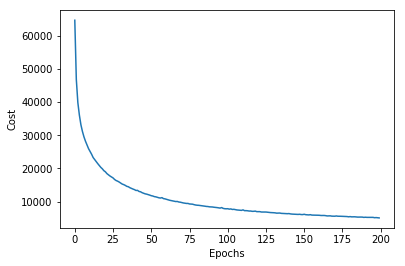

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.plot(range(nn.epochs), nn.eval_['cost'])
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

As we can see , the cost decreased sustantially during the ffirest 100 epochs and seems to slowly sonverge in the last 100 epochs. However, the samll slope between epoch 175 and epoch 200 indicates tht he cost would further decrease with a trainig over additional epochs.

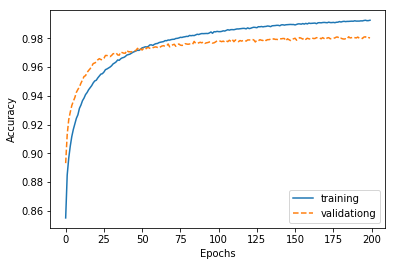

In [12]:
plt.plot(range(nn.epochs) , nn.eval_['train_acc'], label='training')
plt.plot(range(nn.epochs) , nn.eval_['valid_acc'], label='validationg', linestyle='--')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()


The plot reveal that the gap between training adn vlaidation accuracy increases with more epochs we train the network. At approximately the 50th epoch, the training and validation accuracy values are equal, and then, the netork starts overfitting the training data.


In [14]:
y_test_pred = nn.predict(X_test)
acc = (np.sum(y_test == y_test_pred).astype(np.float) / X_test.shape[0])
print('Training accuracy: %.2f%%' %(acc *100))

Training accuracy: 97.52%


Lastly, let's take a look at some off the images that our MLP struggles with:

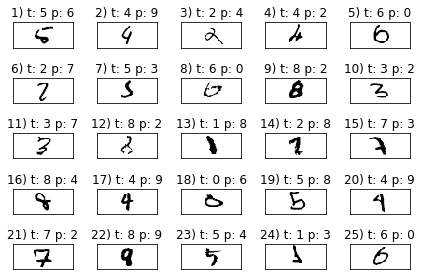

In [16]:
miscl_img = X_test[y_test != y_test_pred][:25]
correct_label = y_test[y_test != y_test_pred][:25]
miscl_label = y_test_pred[y_test != y_test_pred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28,28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    
    ax[i].set_title('%d) t: %d p: %d' %(i+1, correct_label[i], miscl_label[i]))
ax[0].set_xticks([])
ax[1].set_yticks([])
plt.tight_layout()
plt.show()



### Training an artificial neural network

The logistic cost function what we implemented as the  _ compute-cost _ method is actually pretty simple to follow since it is the sam ecost function taht we escribe din the logistic regression .

<center>$J(w) = - \sum_{i=1}^{n} y^{[i]}log(a^{[i]}) +(1 - y^{[i]})log(1-a^{[i]})$  </center>

Here $a^{[i]} $ is the sigmoid activation of the ith sample in the dataset, whe we compute in the forward progpagation step:


<center>$ac = \phi(z^{[i]} )$</center>

Now let's add a regularization term, which allows us to reduce the degree of overfitting.

<center>$J(w) = - [\sum_{i=1}^{n} y^{[i]}log(a^{[i]}) +(1 - y^{[i]})log(1-a^{[i]})] + \frac {\lambda}{2} ||w||^2_2$  </center>


### Developing your intuition for backpropagation

- Backpropagation is a very computationally efficient approach to compute the parital derivatives of a complex cost funciton in mulitlayer neural networks.
- Here our goal is to use those derivatives to learn the weight coefficients for parameterizing such a multilayer artificial nerual network.
- The challenge in the parameteization of neural netowrks is that we are typically dealing with a very large number of weight coefficeints in a high-dimensional feature space. the error suface of aneural network cost funciton is not convex or smooth with respect to the parameters.
- there are may bumps in this high-dimensional cost surface (local minima) tha we have to overcome in order o find the global minimum of the cost function.


[Who invented Backpropagation?](http://people.idsia.ch/~juergen/who-invented-backpropagation.html)


Recall the __chain rule__  is an approach to compute the derivative of a complex , nesed function , such asf(g(x)), as follows:
<center>$\frac {d[f(g(x))]}{dx} = \frac {df}{dg}.\frac{dg}{dx}$</center>

similarly we can use the chaine rule for an arbitarily  long function composition. like 
F = f(g(h(u(v(x))))).


<center>$\frac {dF}{dx} =  \frac {dF(x)}{dx} = \frac {df(g(h(u(v(x)))))}{dx} = \frac {df}{dg}.\frac{dg}{dh}.\frac{dh}{du}.\frac{du}{dv}.\frac{dv}{dx}$</center>


In the context of computer algebra, a set of techniques has been developed to solve such problems very efficiently, which is also known as __automatic differentiation__.

[Automatic differentiation of algorithms for Machine learning](https://arxiv.org/pdf/1404.7456.pdf)

Automatic differentiaiton comes with two modes, the __forward__ and __reverse__ modes;<font style='color:#822879'> backpropagation is simply just a special case of reverse mode automatic differnetiation</font> The key point is that applying the chaing rule in the forward mode can be quite expensive since we would have to multiply large metrices fore each layer that we eventually multiply by a vectoer to optioatn the output.

- The trick of reverse mode isthat we start from right to left: we multiply a matrix by a vector, which yields another vector that is multiplied by the next matrix and so on. Matrix-vector multiplication is computationally much cheaper than matrix-matrix multiplication, which is why backpropagation is one of the most popular algorithms used in neural network training.



![image for connected MLP backpropagation](12_12.png)

- Mini-bathc learing is a special form of stochastic gradient descent where we compute the gradient based on a subset _k_ of the _n_ training samples with _ 1< k< n _ . Mini-bathc learning has the advantage over online learning that we can make use of our vectorized implementations to improve computational efficiency. However we can update the weights much faster than in regular gradient descent.

- <font style='color:#822879'>Multilayer neural networks are much harder to train than simpler algorithms such as __ Adaline, logistic regression , or support vector machines.__  In multilayer neural networks, we typically have hundreds, thousands, or even billions of weights that we need to optimize. Unfortunately , the output function has a rough surface and the __optimisation algorithm can easily become trapped in local minima,__ as show in the following figure:</font>

![Multiple local minima in neurla network training](12_13.png)

Here we only show th cost surface for a single wieght on the x-ais. It is impossible to visualize the actual cost surface for the human eye.

Multiple refernces:

[by Ian goodfellow.](http://www.deeplearningbook.org)   <br>
[Differntial calculation concept for back propagation](https://sebastianraschka.com/pdf/books/dlb/appendix_d_calculus.pdf)


- Books
Pattern Recognition and Machine learning , C.M. Bishop and others
